# Multiple Linear Regression

## from Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset - Students

In [2]:
data_df = pd.read_csv('data/student.csv')
data_df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [3]:
data_df.shape

(1000, 3)

## Analysing the Dataset

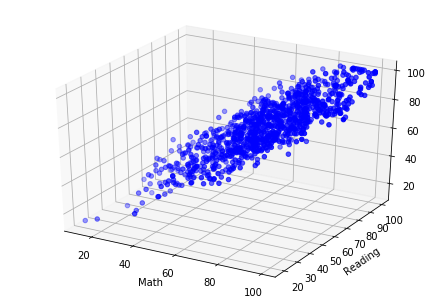

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_df[data_df.columns[0]], data_df[data_df.columns[1]], data_df[data_df.columns[2]], c='b')
plt.xlabel(data_df.columns[0])
plt.ylabel(data_df.columns[1])
plt.show()

## Dependent and Independent Variable

In [5]:
x = np.array([np.ones(data_df.shape[0]), data_df[data_df.columns[0]], data_df[data_df.columns[1]]]).T
x[:5]

array([[ 1., 48., 68.],
       [ 1., 62., 81.],
       [ 1., 79., 80.],
       [ 1., 76., 83.],
       [ 1., 59., 64.]])

In [6]:
y = np.array(data_df[data_df.columns[2]])
y[:5]

array([63, 72, 78, 79, 62])

## Modeling Multiple Regression Model

In [7]:
learning_rate = 0.0001
beta = np.zeros(3)        # array([0, 0, 0])

#### Cost Function 
$$ cost = \frac{\Sigma(\hat{y} - y)^2}{2n} $$

In [8]:
def cost_function(beta):
    return np.sum((x.dot(beta) - y) ** 2) / (2 * len(x))

#### Gradient Decent

        y_hypothesis = x.dot(beta)
        loss = y_hypothesis - y
        gradient = x.T.dot(loss) / len(x)
        step_size = learning_rate * gradient
        beta = beta - step_size

In [9]:
def gradient_decent(beta, iterations=1000):
    cost_history = []
    
    for i in range(iterations):
        beta -= learning_rate * x.T.dot(x.dot(beta) - y) / len(x)
        cost_history.append(cost_function(beta))
        
    return beta, cost_history

In [10]:
beta, cost_history = gradient_decent(beta)
print("Betas: ", beta, "\nCost: ", cost_history[-1])

Betas:  [0.00274048 0.09441056 0.89189383] 
Cost:  10.500043218864263


### Plotting the gradient Decent for each cost

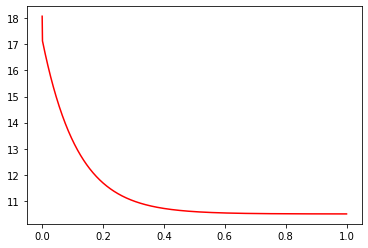

In [11]:
x1 = np.linspace(0, 1, 1000)
plt.plot(x1, cost_history, c='r')
plt.show()

## Predicting from the Multiple Regression Model

In [12]:
y_hat = x.dot(beta)
y_hat[:5]

array([65.18322791, 78.09959554, 78.81268116, 81.205131  , 62.65416869])

## Evaluation Metrics 

#### Root Mean Square Error

$$ RMSE = \sqrt{\frac{\Sigma(y_i - \hat{y})^2}{n}} $$

In [13]:
def RMSE(y_true, y_hat):
    return np.sqrt(sum((y_true - y_hat) ** 2) / len(y_true))

print("RMSE: ", RMSE(y, y_hat))

RMSE:  4.582585126075514


#### R2 Score
$$ RSS = \Sigma(y_i - \hat{y})^2 $$
$$ TSS = \Sigma(y_i - \bar{y})^2 $$
$$ R2 Score = 1 - \frac{RSS}{TSS} $$

In [14]:
def r2_Score(y_true, y_hat):
    RSS = sum((y_true - y_hat) ** 2)
    TSS = sum((y_true - np.mean(y_true)) ** 2)
    return 1 - RSS/TSS

print("R2 Score: ", r2_Score(y, y_hat))

R2 Score:  0.9095075616647043


## Plotting the Linear Reggression Line

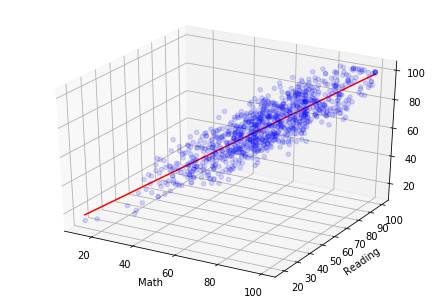

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_df[data_df.columns[0]], data_df[data_df.columns[1]], data_df[data_df.columns[2]], c='b', alpha=0.15)

# Multiple Linear Regression line
x1 = np.linspace(min(data_df[data_df.columns[0]]), max(data_df[data_df.columns[0]]), 5)
x2 = np.linspace(min(data_df[data_df.columns[1]]), max(data_df[data_df.columns[1]]), 5)
xx = np.array([(np.zeros(5)), x1, x2])
y1 = xx.T.dot(beta)
ax.plot(x1, x2, y1, c='r')

plt.xlabel(data_df.columns[0])
plt.ylabel(data_df.columns[1])
plt.show()